In [1]:
# data from: http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

import numpy as np
import pandas as pd

In [2]:
'''
    7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''

"\n    7. Attribute Information:\n\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over\n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds\n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks\n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1

In [3]:
# Creating header
colnames = ['Price','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD'\
                        'TAX','PTRATIO','B','LSTAT','MEDV']

In [4]:
# Reading csv and concatenating the header
housingData = pd.read_csv('housingData.csv', names=colnames)

In [5]:
# Creating the dataframe
housing = pd.DataFrame(housingData)

In [75]:
# Glimpse on the data
housing.head(3)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RADTAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [87]:
# Regression library
from sklearn import datasets, linear_model, preprocessing

In [9]:
# Loading csv file into a readable format for sklearn
data = np.loadtxt(fname = 'housingData.csv', delimiter = ',')

In [44]:
# Normalizing 
dataNorm = preprocessing.normalize(data, norm='l2')

In [98]:
# Dependent variable (TM)

#y = data[:,0]
y = np.array(data[:, np.newaxis, -1])

#x = data[:,6]
x = np.transpose(data[:, :])

In [102]:
# Defining Ridge Regression
def ridgeRegression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = linear_model.Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data, predictors)
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [139]:
# Set the different values of alpha to be tested
alpha_ridge = [1e-2, 1, 5, 10, 20]

# Ridge
ridgereg = linear_model.Ridge(alpha=alpha_ridge[0],normalize=True)
ridgereg.fit(y,x[0])
y_pred = ridgereg.predict(y)

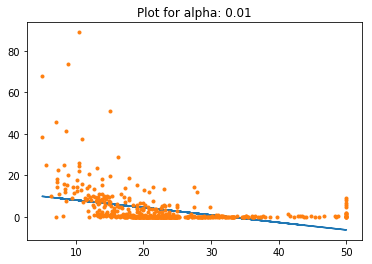

In [140]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(y, y_pred)
plt.plot(y,x[0],'.')
plt.title('Plot for alpha: %.3g'%alpha_ridge[0])

In [145]:
rss = np.sum((y_pred-y)**2)
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)
print('RSS, Intercept, Coef')
print(ret)

RSS, Intercept, Coef
[116054237.33850588, 11.715515827519837, -0.35956427946297331]


In [129]:
# Ridge
ridgereg = linear_model.Ridge(alpha=alpha_ridge[-1],normalize=True)
ridgereg.fit(y,x[0])
y_pred = ridgereg.predict(y)

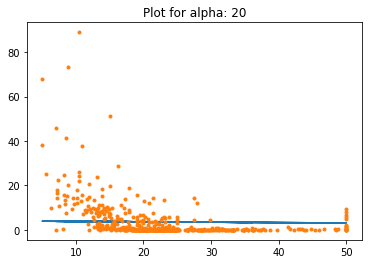

In [130]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(y, y_pred)
plt.plot(y,x[0],'.')
plt.title('Plot for alpha: %.3g'%alpha_ridge[-1])

In [138]:
rss = np.sum((y_pred-y)**2)
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)
print('RSS, Intercept, Coef')
print(ret)

RSS, Intercept, Coef
[113266245.95820288, 4.0031908045936664, -0.017293329631314424]
